In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import seaborn as sns

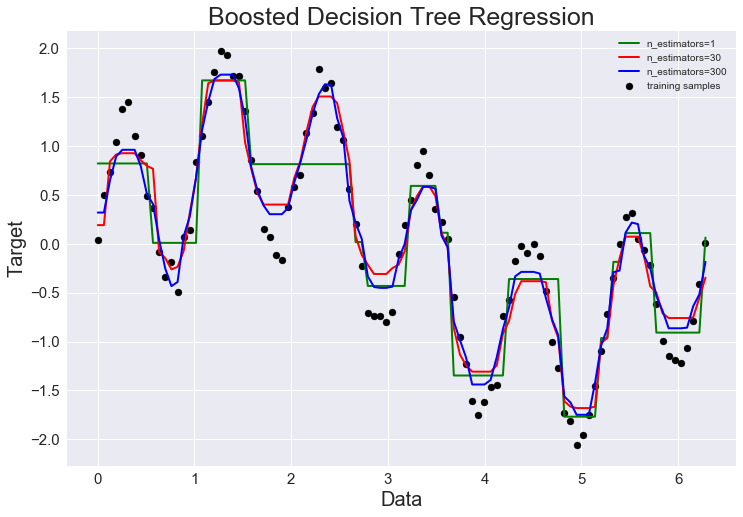

In [2]:
# Create the dataset
X = np.linspace(0, 2*np.pi, 100)
y = np.sin(X) + np.sin(6 * X) + 0.1*np.random.randn(X.shape[0])
X.shape = (X.shape[0],1) # make X a 2D array (it was initialized as a 1D array)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=30)
regr_3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)



regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

# Predict (on a new dataset within the same range)
Xp = np.linspace(0, 2*np.pi, 100)
yp = np.sin(Xp) + np.sin(6 * Xp) + 0.1*np.random.randn(Xp.shape[0])
Xp.shape = (Xp.shape[0],1)
y_1 = regr_1.predict(Xp)
y_2 = regr_2.predict(Xp)
y_3 = regr_3.predict(Xp)

# Plot the results
plt.figure(figsize=[12,8])
plt.scatter(Xp, yp, c="k", label="training samples")
plt.plot(Xp, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(Xp, y_2, c="r", label="n_estimators=30", linewidth=2)
plt.plot(Xp, y_3, c="b", label="n_estimators=300", linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Data", fontsize=20)
plt.ylabel("Target", fontsize=20)
plt.title("Boosted Decision Tree Regression", fontsize=25)
plt.legend()
plt.show()

In [3]:
# Fit additional models to be used for comparison
regr_A = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=10)
regr_B = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=600)

regr_A.fit(X,y);
regr_B.fit(X,y);

In [4]:
# Compare the the scores
print 'Regr_1 R^2 Score:', regr_1.score(Xp,yp)
print 'Regr_2 R^2 Score:', regr_2.score(Xp,yp)
print 'Regr_3 R^2 Score:', regr_3.score(Xp,yp)
print
print 'Regr_A R^2 Score:', regr_A.score(Xp,yp)
print 'Regr_B R^2 Score:', regr_B.score(Xp,yp)

Regr_1 R^2 Score: 0.848062031069
Regr_2 R^2 Score: 0.933239610672
Regr_3 R^2 Score: 0.95920706746

Regr_A R^2 Score: 0.924260080076
Regr_B R^2 Score: 0.957619108093


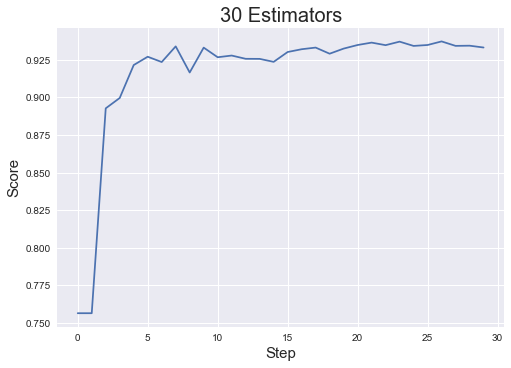

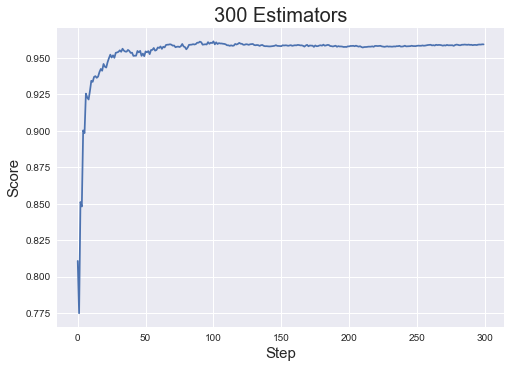

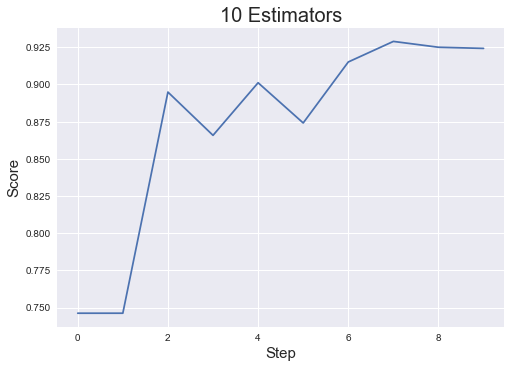

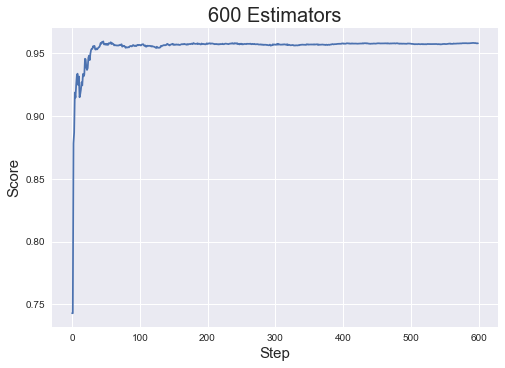

In [5]:
# plot staged scores for the boosted models

for j in [regr_2, regr_3, regr_A, regr_B]:
    a = [i for i in j.staged_score(Xp,yp)]
    tt = str(len(a)) + ' Estimators'
    plt.plot(a)
    plt.title(tt, fontsize = 20)
    plt.xlabel('Step', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.show()

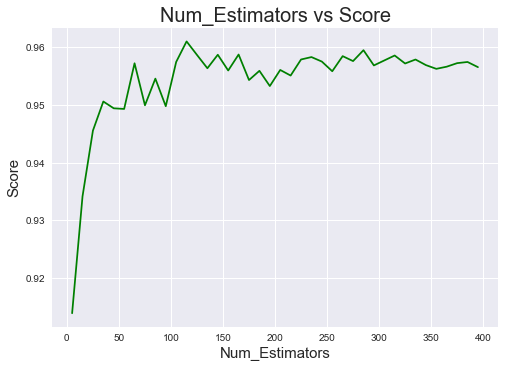

In [6]:
# This plot shows how the model scores/accuracy vary with number of estimators
scoreList = []
numEstimatorList = range(5,401,10)

for n in numEstimatorList:
    thisRegr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=n)
    thisRegr.fit(X,y)
    scoreList.append(thisRegr.score(Xp,yp))
    
plt.plot(numEstimatorList, scoreList, 'g')
plt.title('Num_Estimators vs Score', fontsize = 20)
plt.xlabel('Num_Estimators', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.show()